## Infinite

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

infinite_q_table = np.load('infinite_q_table.npy')
infinite_q_table_no_ace = np.zeros([19,2])
infinite_q_table_ace = np.zeros([19,2])


for index_s, state in enumerate(infinite_q_table): 
    for index_a, ace in enumerate(state): 
        if index_a == 1: 
            infinite_q_table_ace[index_s][0] = ace[0]
            infinite_q_table_ace[index_s][1] = ace[1]
            
        else: 
            infinite_q_table_no_ace[index_s][0] = ace[0]
            infinite_q_table_no_ace[index_s][1] = ace[1]


q_table_no_ace_df = pd.DataFrame(infinite_q_table_no_ace, columns=['stick NA', 'hit NA'], index=np.arange(2,21))
q_table_ace_df = pd.DataFrame(infinite_q_table_ace, columns=['stick A', 'hit A'], index=np.arange(2,21))

q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)
q_table

,stick NA,hit NA,stick A,hit A
2,4.0,479.649626,0.0,0.000000
3,9.0,476.105489,0.0,0.000000
4,16.0,468.826424,0.0,0.000000
5,25.0,460.586042,0.0,0.000000
6,36.0,454.043491,0.0,0.000000
7,49.0,450.507677,0.0,0.000000
8,64.0,442.053784,0.0,0.000000
9,81.0,437.595217,0.0,0.000000
10,100.0,430.281466,0.0,0.000000
11,121.0,431.723986,121.0,544.300990


In [2]:
track = np.load('trackerson_the_2nd.npy')
print(track.shape)

tracker_infinite = np.zeros([19,2])

for index_s, state in enumerate(track): 
    for index_p, ace in enumerate(state): 
            tracker_infinite[index_s][index_p] = ace
               
tracker_infinite_df = pd.DataFrame(tracker_infinite, columns=['no ace', 'ace'], index=np.arange(2,21))
tracker_infinite_df

(19, 2)


,no ace,ace
2,76781.0,0.0
3,76849.0,0.0
4,82213.0,0.0
5,87586.0,0.0
6,92698.0,0.0
7,98151.0,0.0
8,104796.0,0.0
9,111837.0,0.0
10,349051.0,0.0
11,49309.0,76860.0


(19, 2)


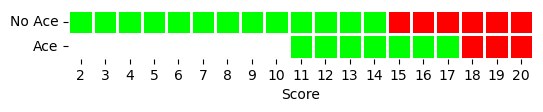

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

infinite_q_policy = np.load('infinite_policy.npy')
print(infinite_q_policy.shape)
policy_df = pd.DataFrame(infinite_q_policy, columns=['No Ace', 'Ace'], index=np.arange(2,21))


fig, ax = plt.subplots(1, 1, figsize=(6, 1))  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask1 = np.full_like(infinite_q_policy.T, False, dtype=bool)
mask1[1,0:9] = True

sns.heatmap(infinite_q_policy.T, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            linecolor='white', linewidths=1,
            ax=ax, cbar=False,
            square=True,
            mask=mask1)

ax.set_xlabel('Score')
ax.set_yticklabels(('No Ace', 'Ace'))
ax.set_xticklabels(('2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'))
ax.tick_params('y', rotation=0)

plt.show()

## Finite

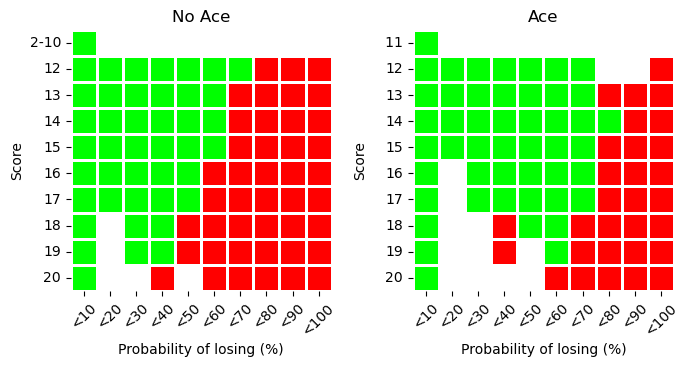

In [4]:
finite_q_policy = np.load('finite_policy.npy')
finite_q_policy_noace = np.zeros([19,10])
finite_q_policy_ace = np.zeros([19,10])
for index_s, state in enumerate(finite_q_policy): 
    for index_p, percentage in enumerate(state): 
        finite_q_policy_noace[index_s][index_p] = percentage[0]
        finite_q_policy_ace[index_s][index_p] = percentage[1]

finite_q_policy_noace = np.delete(finite_q_policy_noace,(0,1,2,3,4,5,6,7,8) ,axis=0)
finite_q_policy_ace = np.delete(finite_q_policy_ace,(0,1,2,3,4,5,6,7,8) ,axis=0)

q_policy_noace_df = pd.DataFrame(finite_q_policy_noace, columns=np.arange(0,10), index=np.arange(11,21))
#q_policy_noace_df.iloc[0:10,1:10]= 3
q_policy_ace_df = pd.DataFrame(finite_q_policy_ace, columns=np.arange(0,10), index=np.arange(11,21))


fig, ax = plt.subplots( 1,2, figsize=(7, 7))  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask2 = np.full_like(q_policy_noace_df, False, dtype=bool)
for index, row in q_policy_noace_df.iterrows():
    for i, value in enumerate(row):
        if value == 2:
            mask2[index-11][i] = True

sns.heatmap(q_policy_noace_df, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[0], cbar=False,
            mask=mask2)

ax[0].set_xlabel('Probability of losing (%)')
ax[0].set_ylabel('Score')
ax[0].tick_params('y', rotation=0)
ax[0].set_yticklabels(('2-10','12','13','14','15','16','17','18','19','20'))
ax[0].set_xticklabels(('<10','<20','<30','<40','<50','<60','<70','<80','<90','<100'))
ax[0].tick_params('x', rotation=45)
ax[0].set_title('No Ace')

mask3 = np.full_like(q_policy_ace_df, False, dtype=bool)
for index, row in q_policy_ace_df.iterrows():
    for i, value in enumerate(row):
        if value == 2:
            mask3[index-11][i] = True

sns.heatmap(q_policy_ace_df, cmap=cmap,
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[1], cbar=False,
            mask=mask3)

ax[1].set_xlabel('Probability of losing (%)')
ax[1].set_ylabel('Score')
ax[1].tick_params('y', rotation=0)
ax[1].set_yticklabels(('   11','12','13','14','15','16','17','18','19','20'))
ax[1].set_xticklabels(('<10','<20','<30','<40','<50','<60','<70','<80','<90','<100'))
ax[1].tick_params('x', rotation=45)
ax[1].set_title('Ace')

fig.tight_layout()
plt.show()

In [5]:
finite_q_table = np.load('finite_q_table.npy')

finite_q_table_noace_hit = np.zeros([19,10])
finite_q_table_noace_stick = np.zeros([19,10])
finite_q_table_ace_hit = np.zeros([19,10])
finite_q_table_ace_stick = np.zeros([19,10])
for index_s, state in enumerate(finite_q_table): 
    for index_p, percentage in enumerate(state): 
        finite_q_table_noace_stick[index_s][index_p] = percentage[0,0] 
        finite_q_table_noace_hit[index_s][index_p] = percentage[0,1]
        finite_q_table_ace_stick[index_s][index_p] = percentage[1,0]
        finite_q_table_ace_hit[index_s][index_p] = percentage[1,1]

finite_q_table_noace_stick = np.array([f"{x:10.2f}" for x in finite_q_table_noace_stick.ravel()]).reshape(finite_q_table_noace_stick.shape)
finite_q_table_noace_hit = np.array([f"{x:10.2f}" for x in finite_q_table_noace_hit.ravel()]).reshape(finite_q_table_noace_hit.shape)
finite_q_table_ace_stick = np.array([f"{x:10.2f}" for x in finite_q_table_ace_stick.ravel()]).reshape(finite_q_table_ace_stick.shape)
finite_q_table_ace_hit = np.array([f"{x:10.2f}" for x in finite_q_table_ace_hit.ravel()]).reshape(finite_q_table_ace_hit.shape)

print("finite_q_table_noace_stick")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_noace_stick]))
print("finite_q_table_noace_hit")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_noace_hit]))
print("finite_q_table_ace_stick")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_ace_stick]))
print("finite_q_table_ace_hit")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_ace_hit]))

finite_q_table_noace_stick
      4.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
      9.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     16.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     25.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     36.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     49.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     64.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     81.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
    100.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00      

In [6]:
mux = pd.MultiIndex.from_product([[0,1,2,3,4,5,6,7,8,9], ['Hit', 'Stick']])

q_finite_values = np.load('finite_q_table.npy')


q_finite_no_ace = np.zeros([19,20])
q_finite_ace = np.zeros([19,20])


for index_s, state in enumerate(q_finite_values): #19
    
    for index_p, percentage in enumerate(state): #10

        i_1 = 0
        i_2 = 0 
        for index_a, ace in enumerate(state): # 2

            if index_a == 1: 
                
                q_finite_ace[index_s][i_1] = ace[1][0]
                i_1 += 1
                q_finite_ace[index_s][i_1] = ace[1][1]
                i_1 += 1
            else: 
                q_finite_no_ace[index_s][i_2] = ace[0][0]
                i_2 += 1 
                q_finite_no_ace[index_s][i_2] = ace[0][1]
                i_2 += 1
          
print(q_finite_no_ace.shape)


# q_table_no_ace_df = pd.DataFrame(q_table_no_ace, columns=mux, index=np.arange(2,21))
# q_table_ace_df = pd.DataFrame(q_table_ace, columns=mux, index=np.arange(2,21))

# q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)

# Create a MultiIndex for the columns
columns = pd.MultiIndex.from_product([range(10), ['stick', 'hit']],
                                     names=['%', 'action'])

# Reshape the numpy array into 19 rows and 20 columns (10 columns * 2 subcolumns)
#reshaped_data = q_finite_no_ace.reshape((19,20))


# Create the DataFrame
df = pd.DataFrame(q_finite_no_ace, columns=columns, index=np.arange(2,21))
df

(19, 20)


%           0                        1                  2              \
action  stick          hit       stick         hit  stick         hit   
2         4.0  1138.748233    0.000000    0.000000    0.0    0.000000   
3         9.0  1141.809421    0.000000    0.000000    0.0    0.000000   
4        16.0  1144.517397    0.000000    0.000000    0.0    0.000000   
5        25.0  1142.691078    0.000000    0.000000    0.0    0.000000   
6        36.0  1136.791218    0.000000    0.000000    0.0    0.000000   
7        49.0  1124.940305    0.000000    0.000000    0.0    0.000000   
8        64.0  1105.675289    0.000000    0.000000    0.0    0.000000   
9        81.0  1060.546268    0.000000    0.000000    0.0    0.000000   
10      100.0   988.953659    0.000000    0.000000    0.0    0.000000   
11      121.0   883.979800    0.000000    0.000000    0.0    0.000000   
12      144.0  1003.691725  144.000000  583.904532  144.0  435.246721   
13      169.0   989.377878  169.000000  583.220309  169.0  433.171869   
14      196.0   969.318633  196.000000  592.036720  196.0  434.105180   
15      225.0   935.380610  225.000000  578.717793  225.0  436.509205   
16      256.0   897.637785  256.000000  586.353525  256.0  436.665757   
17      289.0   843.733766  289.000000  563.360318  289.0  431.256395   
18      324.0   767.540236  324.000000  555.375409  324.0  412.017269   
19      361.0   634.743586  292.312052  486.651580  361.0  382.676811   
20      400.0   441.000000    0.000000  438.719318  400.0  288.025285   

%                3                  4                  5                  6  \
action       stick         hit  stick         hit  stick         hit  stick   
2         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
3         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
4         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
5         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
6         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
7         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
8         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
9         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
10        0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
11        0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
12      144.000000  307.116912  144.0  264.009197  144.0  159.350352  144.0   
13      169.000000  316.192073  169.0  258.899437  169.0  166.679358  169.0   
14      196.000000  308.990597  196.0  259.013853  196.0  182.663518  196.0   
15      225.000000  310.142105  225.0  257.459768  225.0  169.636395  225.0   
16      256.000000  310.850500  256.0  255.332868  256.0  184.594086  256.0   
17      289.000000  305.857409  289.0  268.133017  289.0  166.444886  289.0   
18      324.000000  307.383051  324.0  264.099326  324.0  179.214642  324.0   
19      361.000000  265.437529  361.0  270.550636  361.0  173.489546  361.0   
20      285.822334  118.666116  400.0  224.913819  400.0  149.729077  400.0   

%                       7                  8                9       
action         hit  stick         hit  stick        hit stick  hit  
2         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
3         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
4         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
5         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
6         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
7         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
8         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
9         0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
10        0.000000    0.0    0.000000    0.0   0.000000   0.0  0.0  
11        0.000000    0.0    0.000000    0.0   

In [7]:
print(q_finite_values[10][1][0][1])


470.1265837334255


In [8]:
trackerr = np.load('trackery_mcTrackerson.npy')
print(trackerr.shape)

tracker_noace = np.zeros([19,10])
tracker_ace = np.zeros([19,10])

for index_s, state in enumerate(trackerr): 
    for index_p, percentage in enumerate(state): 
            tracker_noace[index_s][index_p] = percentage[0]
            tracker_ace[index_s][index_p] = percentage[1]

tracker_noace_df = pd.DataFrame(tracker_noace, columns=np.arange(0,10), index=np.arange(2,21))

print(tracker_noace_df)
tracker_noace_df= tracker_noace_df.to_numpy()
tracker_noace_df = np.array([f"{x:10.2f}" for x in tracker_noace_df.ravel()]).reshape(tracker_noace_df.shape)
tracker_ace_df = pd.DataFrame(tracker_ace, columns=np.arange(0,10), index=np.arange(2,21))
tracker_ace_df = tracker_ace_df.to_numpy()
tracker_ace_df = np.array([f"{x:10.2f}" for x in tracker_ace_df.ravel()]).reshape(tracker_ace_df.shape)

print('tracker_noace_df')
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in tracker_noace_df]))
print('tracker_ace_df')
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in tracker_ace_df]))


(19, 10, 2)
            0        1         2         3         4         5         6  \
2    649225.0      0.0       0.0       0.0       0.0       0.0       0.0   
3    650862.0      0.0       0.0       0.0       0.0       0.0       0.0   
4    681949.0      0.0       0.0       0.0       0.0       0.0       0.0   
5    734975.0      0.0       0.0       0.0       0.0       0.0       0.0   
6    769619.0      0.0       0.0       0.0       0.0       0.0       0.0   
7    833038.0      0.0       0.0       0.0       0.0       0.0       0.0   
8    870715.0      0.0       0.0       0.0       0.0       0.0       0.0   
9    940377.0      0.0       0.0       0.0       0.0       0.0       0.0   
10  2940383.0      0.0       0.0       0.0       0.0       0.0       0.0   
11   410413.0      0.0       0.0       0.0       0.0       0.0       0.0   
12    34299.0  38078.0  226736.0  389446.0   58310.0   28674.0    8663.0   
13    24013.0  13528.0   66279.0  343638.0  263607.0   68906.0   19070.0   


Graphing average values of hands

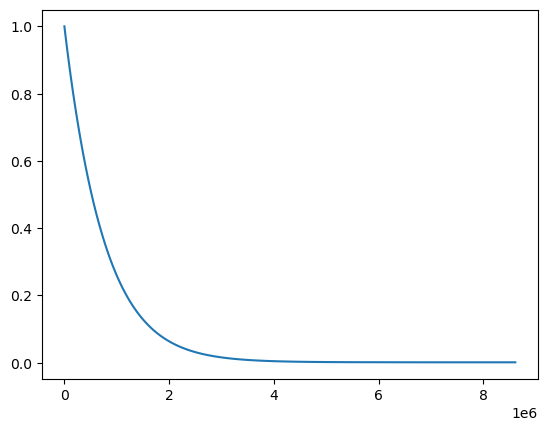

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
alpha_tracking = np.load("tracking/alpha_track_finite.npy")
plt.plot(alpha_tracking)

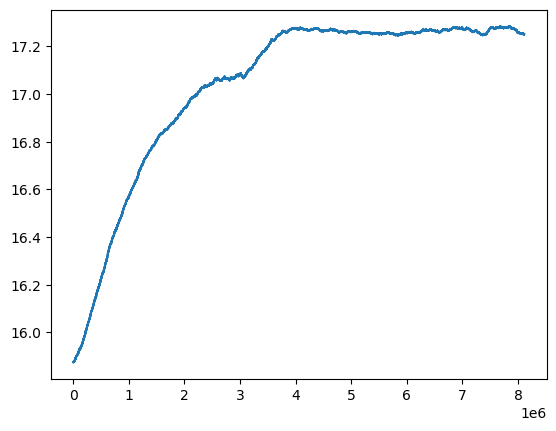

In [10]:
sumOfHand = np.load("tracking/hand_sum_track_finite.npy")
sumOfHand = np.convolve(sumOfHand, np.ones(500000)/500000, mode='valid')
plt.plot(sumOfHand)

In [11]:
def cumulative_sum_array(input_array):
    return np.cumsum(input_array)

sumOfPrevious = cumulative_sum_array(sumOfHand)


cumulativeSum = cumulative_sum_array(sumOfHand)



def create_index_plus_one_array(length):
    return np.arange(length) + 1


alpha_4 = alpha_tracking

numberOfHands = create_index_plus_one_array(len(sumOfHand))

averageValueOfHands_4 = np.divide(cumulativeSum, numberOfHands)
Value_of_hands_4 = sumOfHand

In [12]:
#plt.plot(averageValueOfHands_1, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
# 



plt.plot(averageValueOfHands_2, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
plt.plot(averageValueOfHands_3, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.8 trained for 100000 hands')
plt.plot(averageValueOfHands_4, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
# plt.plot(averageValueOfHands_5, label='decreasing alpha 50000 with decay rate 150')

plt.legend()

plt.show()

# plt.plot(averageValueOfHands_2, label='decreasing alpha 10000 with decay rate 5')
# plt.legend()

# plt.show()

# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()


# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()



# plt.plot(alpha_5)
plt.plot(alpha_4 ,label = 'alpha with decay rate 0.01')
# plt.plot(alpha_3)
# plt.plot(alpha_2)
plt.plot(alpha_3, label = 'alpha with decay rate 0.8')
plt.plot(alpha_2, label = 'alpha with decay rate 0.2')
plt.legend()
plt.show()

NameError: name 'averageValueOfHands_2' is not defined